# generating figure one

In [1]:
from lib.my_initialization import *
from lib import *
from lib.utils.merge_cloud_results import *
import seaborn as sns
from scipy.interpolate import CubicSpline
import matplotlib.lines as lines
%load_ext autoreload
%autoreload 2

In [40]:
# file=search_for_file()

In [41]:
# file="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8_diffCoef_0.0005/all_traj_longer_than_500.csv"
file="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8_diffCoef_0.0005/trajectories_unwrap/ic018.21_traj_sr_600_mem_0_unwrap.csv"
df=pd.read_csv(file)
df.head()

,t,n,x,y,grad_ux,grad_uy,grad_vx,grad_vy,frame,particle
0,100.1,16,0.000000,0.000000,-3.390770,1.041792,2.619612,0.979396,0,0
1,102.1,16,-0.687466,-0.913199,-0.397678,1.005516,0.823390,1.000000,1,0
2,104.1,14,-1.025179,-1.484508,9.624050,-22.502845,1.286155,0.227150,2,0
3,106.1,18,-2.142416,-1.807902,-4.184929,15.095522,1.407980,-0.096610,3,0
4,108.1,14,-2.508356,-1.780866,0.097265,3.443551,1.783593,-1.107906,4,0


In [129]:
# i=13
# i=11
# i=10#7
# i=3
i=15#14
i=15
num_obs_series=df.groupby('particle').count().t
long_particle=num_obs_series.sort_values(ascending=False).head(i+1)
pid=long_particle.index.values[i]
DT=compute_time_between_frames(df);
lifetime=DT*long_particle.values[i]
print(f"the longest particle lasted {lifetime} ms for this trial.")

the longest particle lasted 458.0 ms for this trial.


the 15th longest trajectory looks pretty for this trial (ic018.21).

tmin_sec=1.672


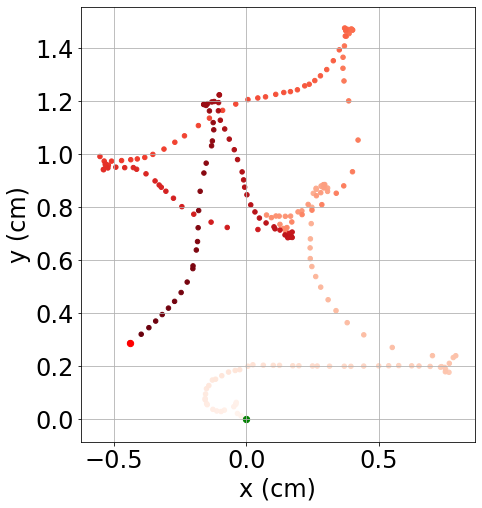

In [138]:
d=df[df.particle==pid].copy()
tmin_sec=np.around(d.t.min()/10**3,3)
tmax_sec=np.around(d.t.max()/10**3,3)
print(f'tmin_sec={tmin_sec}')
retval=PlotFlowerTrajectories(d, col='t', width=200, height=200, fontsize=24, DS=0.025, DT=1.0, jump_thresh=10.0, alpha=1, saving=False, savefig_folder=None, savefig_fn=None, chop_at_first_jump=False, ax=None, cmap='Reds')#, **kwargs)

In [71]:
#DONE: select longest particle
#TOOD: plot ^their trajectories > save_fn =f"{nb_dir}/Figures/fig_1b.png"
#TODO: snapshot for fig. 1a
#TODO: heatmap and histogram of net displacements
#TODO(elsewhere): insets for fig. 2a
# pid=709

[709]

# generate data for figure 1 (A)

In [139]:
#DONE: load ic
#DONE: integrate to tmin_sec
#DONE: track trajectory up to some time at a high time resolution
#DONE: take snapshot of texture


In [135]:
file

'/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8_diffCoef_0.0005/trajectories_unwrap/ic018.21_traj_sr_600_mem_0_unwrap.csv'

In [141]:
# ic_fn=search_for_file()
ic_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/ic-out/ic018.21.npz'

In [149]:
txt=load_buffer(ic_fn)
txt.shape

(200, 200, 18)

In [143]:
results_folder=f"{nb_dir}/Data/fig-1-data"
if not os.path.exists(results_folder):
    os.mkdir(results_folder)

In [147]:
K_o=3.8
diffCoef=0.0005
#cython accelerated time integration of LR model
from lib.routines.generate_tip_logs_LR_model_cy import *
from lib.routines.kwargs_LR_model_cy import get_kwargs
kwargs = get_kwargs(file,results_folder=results_folder)
kwargs['tmax']=tmin_sec;print(tmin_sec)
kwargs['diffCoef']=diffCoef
kwargs['K_o']=K_o

1.672


In [194]:
# retval = generate_tip_logs_from_ic(ic_fn, **kwargs)
# print(f"completed birth_death_rates_from_ic: {ic}")
# print(f"csv of spiral tip data stored in: {kwargs['completed_ic_dir']}")


In [195]:
# #CUDA accelerated time integration of FK model
# from lib.routines.gener_tip_logs_cuda import *
# context = drv.Device(0).make_context()
# df,txt=routine_gener_tip_logs_cuda(ic=txt,tmax_sec= 1.,tmin_sec=0.,
#     printing=True,recording=False,
#     diffCoef=0.001,output_time_resolution=2.,context=context)
# print(df)

In [209]:
# plt.imshow(txt[...,0])

In [164]:
# dt=0.01
# dsdpixel=0.025
# width=200;height=200
printing=True
dt, one_step_map = get_one_step_map(nb_dir,dt=dt,width=width,height=height,**kwargs)
# dt, one_step_map = get_one_step_map(nb_dir,dt,**kwargs)
# dt, one_step_map = get_one_step_map(nb_dir,dt,dsdpixel,width,height,**kwargs)
# dt, one_step_map = get_one_step_map(nb_dir,dt,**kwargs)
txt_Istim_none=np.zeros(shape=(width,height), dtype=np.float64, order='C')
tmin_early_stopping=tmin_sec*10**3
t=0.
txt=load_buffer(ic_fn).astype('float64')
if printing:
    print(f"integrating to time t={tmin_early_stopping:.3f} ms without recording with dt={dt:.3f} ms.")
    print(f"long run times ~30 minutes expected...")
while (t<tmin_early_stopping):
    one_step_map(txt,txt_Istim_none)
    t+=dt
#precompute anything that needs precomputing
compute_all_spiral_tips= get_compute_all_spiral_tips(mode='simp',width=width,height=height)


integrating to time t=1672.000 ms without recording with dt=0.010 ms.


In [165]:
beep(4)

0

In [169]:
level1=-50.
level2=0.
#TODO: track trajectory up to some time at a high time resolution
#check for any tips being present
inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
img=inVc[...,0]
dimgdt=dVcdt[...,0]
dict_out=compute_all_spiral_tips(t,img,dimgdt,level1,level2)#,width=width,height=height)
n_tips=dict_out['n']#skip this trial if no spiral tips are present

In [172]:
txt_tmin_sec=txt.copy()

In [174]:
#integrate by 300 ms while recording
t_obs_sec=tmin_sec+0.3
DT=0.4
save_every_n_frames=int(DT/dt)

In [178]:
#TODO: track trajectory up to some time at a high time resolution
tmax=t_obs_sec*10**3
dict_out_lst=[]
logging=True
if n_tips==0:
    dict_out_lst.append(dict_out)
# n_tips=1 #to initialize loop invarient (n_tips > 0) to True
if printing:
    #print(f"sigma is {sigma}, threshold is {threshold}.")
    #print(f"pad is {pad}, rejection_distance is edge_tolerance is {edge_tolerance}.")
    print(f"integrating to no later than time t={tmax:.3f} milliseconds. ms with recording with dt={dt:.3f} ms.")
# if timing:
# 	start = time.time()
##########################################
#run the simulation, measuring regularly
##########################################
step_count = 0
while (t<tmax) & (n_tips > 0):
    if step_count%save_every_n_frames == 0:
        #compute tip locations in dict_out
        #update texture namespace
        inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
        # txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
        img=inVc[...,0]
        dimgdt=dVcdt[...,0]
        dict_out=compute_all_spiral_tips(t,img,dimgdt,level1,level2)#,width=width,height=height)

        #save tip data
        n_tips=dict_out['n']
        # n_tips_lst.append(n_tips)
        # t_lst.append(t)
        dict_out_lst.append(dict_out)

        #update progress bar after each measurement
        if not logging:
            if printing:
                printProgressBar(step_count, num_steps, prefix = 'Progress:', suffix = 'Complete', length = 50)

    #forward Euler integration in time
    one_step_map(txt,txt_Istim_none)
    #advance time by one step
    t   += dt
    step_count += 1
    if not logging:
        if printing:
            printProgressBar(step_count, num_steps, prefix = 'Progress:', suffix = 'Complete', length = 50)

if printing:
    #report the bottom line up front
    # if timing:
    # 	print(f"\ntime integration complete. run time was {time.time()-start:.2f} seconds in realtime")
    if n_tips==0:
        print(f"zero tips remaining at time t = {t:.1f} ms.")
    print(f"\ncurrent time is {t:.1f} ms in simulation time.")
    print(f"number of nan pixel voltages is {np.max(sum(np.isnan(txt[...,0])))}.")
    print(f"number of tips is = {n_tips}.")


integrating to no later than time t=1972.000 milliseconds. ms with recording with dt=0.010 ms.

current time is 1972.0 ms in simulation time.
number of nan pixel voltages is 0.
number of tips is = 10.
Caution! max_time was reached! Termination time not reached!  Consider rerunning with greater max_tim if termination is desired.


In [182]:
#save txt as .npy, and save dict_out_lst as tips_before_snapshot.csv
tmax_sec=np.around(d.t.max()/10**3,3)
savedf_before_fn='tips_before_snapshot.csv'
savetxt_obs_fn='txt_obs.npy'
os.chdir(results_folder)
np.save(savetxt_obs_fn,txt)
print(f"consider tmax_sec={tmax_sec} before integrating further...")
beep(5)

consider tmax_sec=2.128 before integrating further...


0

In [192]:
df=pd.concat((pd.DataFrame(do) for do in dict_out_lst))
df.reset_index(inplace=True,drop=True)
df.to_csv(savedf_before_fn)

In [193]:
#DONE: finish off recording for that trajectory
#DONE: track trajectory up to some time at a high time resolution
tmax=tmax_sec*10**3
# dict_out_lst=[]
logging=True
if n_tips==0:
    dict_out_lst.append(dict_out)
# n_tips=1 #to initialize loop invarient (n_tips > 0) to True
if printing:
    #print(f"sigma is {sigma}, threshold is {threshold}.")
    #print(f"pad is {pad}, rejection_distance is edge_tolerance is {edge_tolerance}.")
    print(f"integrating to no later than time t={tmax:.3f} milliseconds. ms with recording with dt={dt:.3f} ms.")
# if timing:
# 	start = time.time()
##########################################
#run the simulation, measuring regularly
##########################################
step_count = 0
while (t<tmax) & (n_tips > 0):
    if step_count%save_every_n_frames == 0:
        #compute tip locations in dict_out
        #update texture namespace
        inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
        # txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
        img=inVc[...,0]
        dimgdt=dVcdt[...,0]
        dict_out=compute_all_spiral_tips(t,img,dimgdt,level1,level2)#,width=width,height=height)

        #save tip data
        n_tips=dict_out['n']
        # n_tips_lst.append(n_tips)
        # t_lst.append(t)
        dict_out_lst.append(dict_out)

        #update progress bar after each measurement
        if not logging:
            if printing:
                printProgressBar(step_count, num_steps, prefix = 'Progress:', suffix = 'Complete', length = 50)

    #forward Euler integration in time
    one_step_map(txt,txt_Istim_none)
    #advance time by one step
    t   += dt
    step_count += 1
    if not logging:
        if printing:
            printProgressBar(step_count, num_steps, prefix = 'Progress:', suffix = 'Complete', length = 50)

if printing:
    #report the bottom line up front
    # if timing:
    # 	print(f"\ntime integration complete. run time was {time.time()-start:.2f} seconds in realtime")
    if n_tips==0:
        print(f"zero tips remaining at time t = {t:.1f} ms.")
    print(f"\ncurrent time is {t:.1f} ms in simulation time.")
    print(f"number of nan pixel voltages is {np.max(sum(np.isnan(txt[...,0])))}.")
    print(f"number of tips is = {n_tips}.")

integrating to no later than time t=2128.000 milliseconds. ms with recording with dt=0.010 ms.

current time is 2128.0 ms in simulation time.
number of nan pixel voltages is 0.
number of tips is = 10.
Caution! max_time was reached! Termination time not reached!  Consider rerunning with greater max_tim if termination is desired.


In [198]:
savedf_after_fn='tips_after_snapshot.csv'
df_final=pd.concat((pd.DataFrame(do) for do in dict_out_lst))
df_final.reset_index(inplace=True)
df_final.to_csv(savedf_after_fn)

In [207]:
#DONE: compute trajectory of that particle
#DONE: compute unwrapped trajectory of that particle
sr=600;mem=0;round_t_to_n_digits=6;jump_thresh=20
#track tips, unwrap them, and then truncate at the first jump of distance greater than jump_thresh pixels
df_final=return_unwrapped_trajectory(df_final, width, height, sr, mem, dsdpixel, DT, round_t_to_n_digits,jump_thresh)#, **kwargs)
df_final.to_csv(savedf_after_fn)

Frame 1139: 9 trajectories present.


# plot figure 1a

In [281]:
# t_obs_sec=1.972
# DT=0.4

In [430]:
#TODO: superimpose those same two trajectories onto the snapshot
os.chdir(results_folder)
txt_obs=load_buffer(savetxt_obs_fn)

# savedf_after_fn='tips_after_snapshot.csv'
df_final=pd.read_csv('tips_after_snapshot.csv')

In [431]:
(t_obs_sec*10**3-DT/2. >=df_final.t)&(t_obs_sec*10**3+DT/2. <=df_final.t)
t_values=df_final.t.values
t0=t_values[0]
frameno=(t_obs_sec*10**3-t0)/DT

In [432]:
frameno=int(frameno)

In [433]:
#select tip locations
dict_out=dict_out_lst[frameno]
x_values=np.array(dict_out['x'])
y_values=np.array(dict_out['y'])

In [437]:
# track unwrapped tips
df=pd.concat((pd.DataFrame(do) for do in dict_out_lst))
df.reset_index(inplace=True,drop=True)
# generate_track_tips_pbc
df.drop_duplicates(subset=['t','x','y'],keep='first',inplace=True)
#,ignore_index=True)
df = compute_track_tips_pbc(df, mem, sr, width, height)#,**kwargs)
df_final=df.copy()

Frame 1139: 9 trajectories present.


In [440]:
boo=df_final.frame==frameno
d=df_final[boo].copy()
x_values=d.x.values
y_values=d.y.values
pid_lst_present=d.particle.values

In [441]:
i=9;pid=pid_lst_present[i]
pid1=pid
i=2;pid=pid_lst_present[i]
pid2=pid

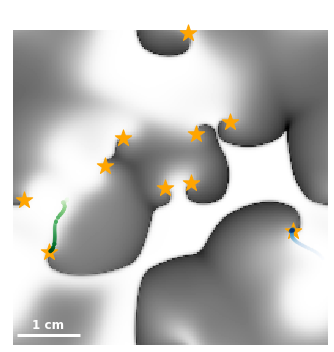

In [462]:
#DONE: superimpose those trajectories onto Fig. 1A
save_fn =f"fig_1a.png"
figsize=(5,5)
saving=False
fontsize = 12

img=txt_obs[...,0]
img_show=-(img+np.min(img) )/ ( np.max(img) -np.min(img) )
fig,ax=plt.subplots(figsize=figsize)
ax.imshow(img_show,cmap='gray')

#plot all tips
ax.scatter(x_values,y_values,marker='*',s=300,alpha=1.0,color='orange')

#up to the current frame
boo=df_final.frame<frameno;boo&=df_final.particle==pid1
d=df_final[boo].copy()
x_values_self=d.x.values;y_values_self=d.y.values;c_values_self=d.t.values
ax.scatter(x_values_self,y_values_self,c=c_values_self,marker='.',s=30,alpha=0.4,cmap='Blues')
boo=df_final.frame<frameno;boo&=df_final.particle==pid2
d=df_final[boo].copy()
x_values_self=d.x.values;y_values_self=d.y.values;c_values_self=d.t.values
ax.scatter(x_values_self,y_values_self,c=c_values_self,marker='.',s=30,alpha=0.4,cmap='Greens')
#insert scale bar
uml = 1#cm
lamda=0.025#cm/pxl
pxl = 315/5#12#uml/lamda#pxl
xstart=17#17;ycoord=17
l1 = lines.Line2D([xstart, xstart+pxl], [ycoord, ycoord], color='white', linewidth=3, solid_capstyle='butt')
fig.lines.extend([l1])
message=r'1 cm'
ax.text(x=11.5, y=187, c='white', s=message, weight='bold', fontsize=fontsize, horizontalalignment='left', verticalalignment='center')
ax.axis('off')

if not saving:
    plt.tight_layout()
    plt.show()
else:
    os.chdir(results_folder)
    plt.savefig(save_fn, bbox_inches='tight', pad_inches=0.)#, dpi=300)

# plot Fig. 1b


In [418]:
#unwrap and center the token trajectories
boo=df_final.particle==pid1
d=df_final[boo].copy()
d1=unwrap_traj_and_center(d,width,height,DS=0.025)
boo=df_final.particle==pid2
d=df_final[boo].copy()
d2=unwrap_traj_and_center(d,width,height,DS=0.025)

#flip y-axis to match fig. 1a
d1.y*=-1
d2.y*=-1

In [426]:
#TODO: linearly interpolate more t_values
d1.t.values
interpolate

In [463]:
jump_thresh

20

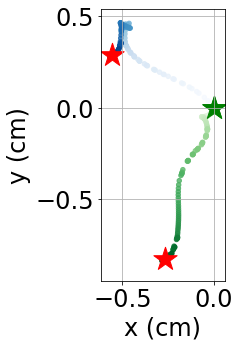

In [471]:
#DONE: superimpose those trajectories onto Fig. 1A
save_fn =f"fig_1b.png"
figsize=(5,5)
saving=False
fontsize = 12

img=txt_obs[...,0]
img_show=-(img+np.min(img) )/ ( np.max(img) -np.min(img) )
fig,ax=plt.subplots(figsize=figsize)

ax=PlotFlowerTrajectories(d1, col='t', width=width, height=height, fontsize=24, 
                              DS=0.025, DT=DT, jump_thresh=jump_thresh, alpha=0.8, saving=False, 
                              savefig_folder=None, savefig_fn=None, chop_at_first_jump=False, 
                              ax=ax, cmap='Blues',s=200)#, **kwargs)
ax=PlotFlowerTrajectories(d2, col='t', width=width, height=height, fontsize=24, 
                              DS=0.025, DT=DT, jump_thresh=jump_thresh, alpha=0.8, saving=False, 
                              savefig_folder=None, savefig_fn=None, chop_at_first_jump=False, 
                              ax=ax, cmap='Greens',s=200,marker='*')
# retval=PlotFlowerTrajectories(d, col='t', width=200, height=200, fontsize=24, DS=0.025, DT=1.0, jump_thresh=10.0, alpha=1, saving=False, savefig_folder=None, savefig_fn=None, chop_at_first_jump=False, ax=None, cmap='Reds')#, **kwargs)

#DONE: select longest particle
#TOOD: plot ^their trajectories > save_fn =f"{nb_dir}/Figures/fig_1b.png"
#TODO: snapshot for fig. 1a
#TODO: heatmap and histogram of net displacements
#TODO(elsewhere): insets for fig. 2a
# pid=709

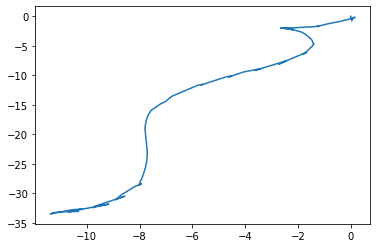

In [466]:
plt.plot(d2.x.values,d2.y.values)

In [ ]:
#TODO: plot that unwrapped trajectory onto Fig. 1B
save_fn =f"{nb_dir}/Figures/fig_1b.png"
#TODO(later, in draw): indicate the range of the particle, R


#TODO: compute ensemble averages of ranges
#TODO: plot heatmap of MSD(tau_final) that shows isotropy (Fig. 1C)
save_fn =f"{nb_dir}/Figures/fig_1c.png"
#TODO: plot histogram of R that shows distribution (Fig. 1D)
save_fn =f"{nb_dir}/Figures/fig_1d.png"